# Logistic regression with pymc

## 0. Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pymc as pm
import arviz as az

In [2]:
assert(pm.__version__=='4.0.0')

## 1. Binary univariate classification

In [3]:
N = 50
K=1

In [4]:
x1 = np.random.normal(2.5, 1, N)
x2 = np.random.normal(4, 1, N)
data = pd.DataFrame([x1, x2]).T
data.head()

,0,1
0,3.410272,4.468318
1,3.719601,2.297746
2,1.748968,4.089653
3,2.165402,4.560074
4,5.512937,5.726208


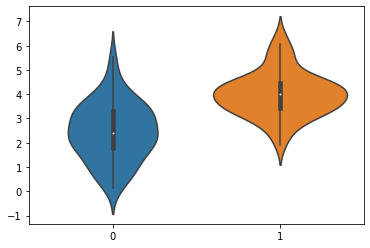

In [5]:
sns.violinplot(data=data)
plt.show()

In [6]:
x_0 = np.concatenate([x1, x2]).reshape((2*N, 1))
y_0 = np.concatenate([np.zeros(N), np.ones(N)]).astype(int)

In [7]:
with pm.Model() as model_0:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10, shape=K)
    mu = alpha + pm.math.dot(x_0, beta)
    theta = pm.Deterministic('theta', 1 / (1 + pm.math.exp(-mu)))
    
    bd = pm.Deterministic('bd', -alpha/beta)
    
    yl = pm.Bernoulli('yl', p=theta, observed=y_0)

    start = pm.find_MAP()
    step = pm.NUTS()
    trace_0 = pm.sample(5000, step, start)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, beta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 39 seconds.


In [8]:
model_0

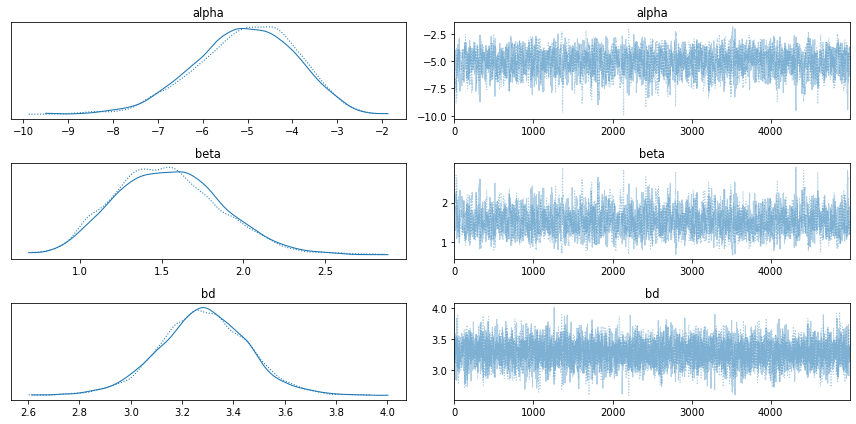

In [9]:
varnames = ['alpha', 'beta', 'bd']
az.plot_trace(trace_0, varnames)
plt.tight_layout()
plt.show()

In [10]:
pm.summary(trace_0, varnames)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-5.056,1.129,-7.113,-3.010,0.029,0.021,1534.0,1635.0,1.0
beta[0],1.539,0.328,0.966,2.159,0.008,0.006,1544.0,1650.0,1.0
bd[0],3.282,0.174,2.954,3.614,0.002,0.001,7129.0,6321.0,1.0


## 2. Binary bivariate classification

In [11]:
N = 50
K=2 #dimensions of our data

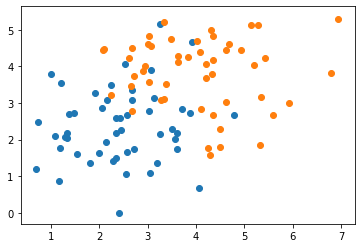

In [12]:
x1 = np.random.normal([2.5,2.5],[1,1], [N,2])
x2 = np.random.normal([4,4],[1,1], [50,2])
plt.scatter(x1[:,0], x1[:,1])
plt.scatter(x2[:,0], x2[:,1])
plt.show()

In [13]:
x_0 = np.concatenate([x1, x2])
y_0 = np.concatenate([np.zeros(N), np.ones(N)]).astype(int)

In [14]:
x_0.shape

(100, 2)

In [15]:
with pm.Model() as model_0:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta1', mu=0, sigma=10, shape=K)
    
    mu = alpha + pm.math.dot(x_0, beta)
    theta = pm.Deterministic('theta', 1 / (1 + pm.math.exp(-mu)))
    bd = pm.Deterministic('bd', -alpha/beta[1]-beta[0]/beta[1]*x_0[:,0])
        
    yl = pm.Bernoulli('yl', p=theta, observed=y_0)

    start = pm.find_MAP()
    step = pm.NUTS()
    trace_0 = pm.sample(5000, step, start)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, beta1]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 53 seconds.


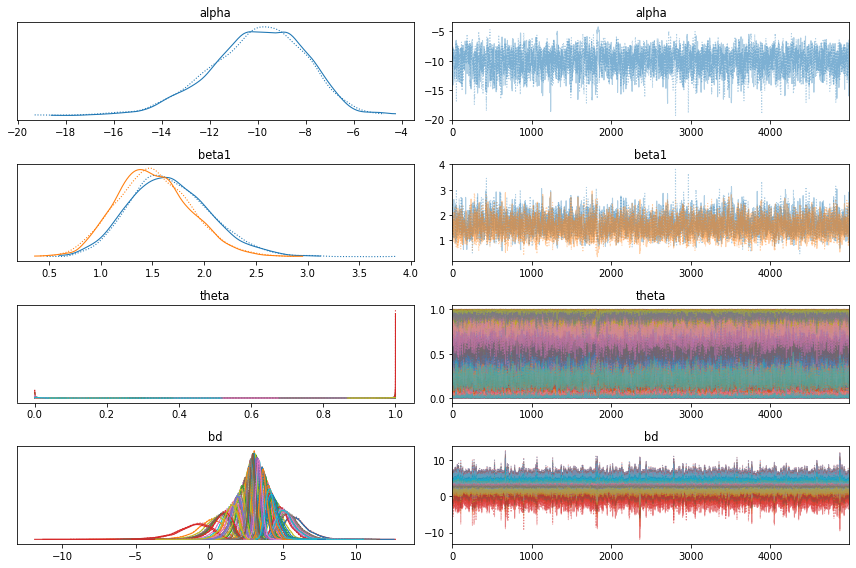

In [16]:
az.plot_trace(trace_0)
plt.tight_layout()
plt.show()